In [1]:
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
import time

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df_all = pd.read_csv('googletrends2.csv')
df = df_all[['Month','Python']]
df.head()

,Month,Python
0,2015-07,15
1,2015-08,16
2,2015-09,19
3,2015-10,19
4,2015-11,20


00:46:49 - cmdstanpy - INFO - Chain [1] start processing
00:46:50 - cmdstanpy - INFO - Chain [1] done processing


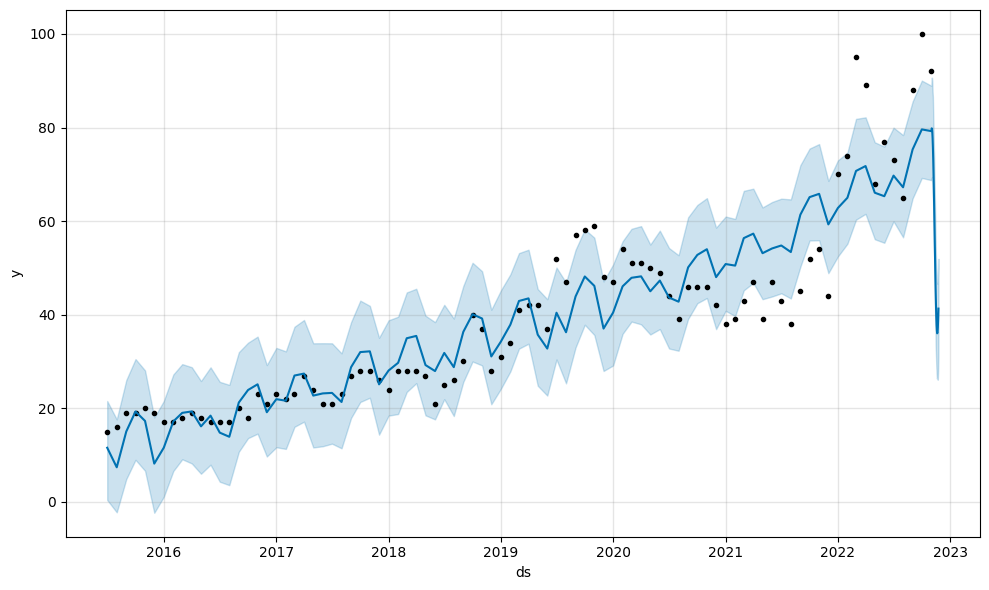

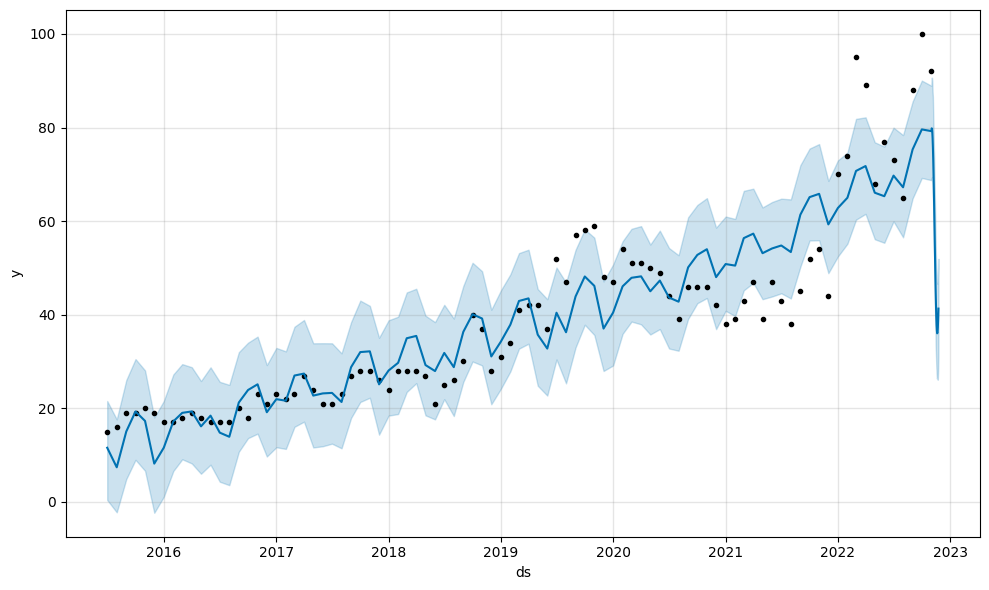

In [ ]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

prophet_df = train.reset_index(drop=True)
prophet_df.columns = ['ds', 'y']

prophet_model = Prophet()
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=len(test))
forecast = prophet_model.predict(future)

prophet_model.plot(forecast)

In [4]:
test_df = test.reset_index(drop=True)
test_df.columns = ['ds', 'y']  

forecast_test = forecast[-len(test):] 

mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])
mse = mean_squared_error(test_df['y'], forecast_test['yhat'])
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 19.50731224387359
MSE: 562.2518094707036
RMSE: 23.711849558199876


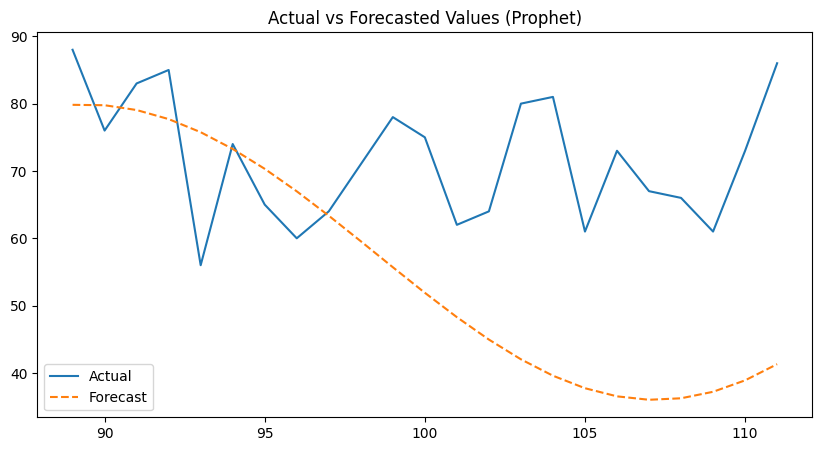

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(test.index, test_df['y'], label='Actual')
plt.plot(test.index, forecast_test['yhat'], label='Forecast', linestyle='--')
plt.legend()
plt.title("Actual vs Forecasted Values (Prophet)")
plt.show()

In [6]:
non_zero_columns = df_all.loc[:, (df_all != 0).any(axis=0)]
gtrend_languages = [col for col in non_zero_columns.columns if col != 'Month']  
num2 = len(gtrend_languages)

d = {}
d['language'] = []
d['mae'] = []
d['mse'] = []
d['rmse'] = []


for language in gtrend_languages:
    df1 = df_all[['Month', language]]
    
    tscv = TimeSeriesSplit(n_splits=10)
    
    fold_mae = []
    fold_mse = []
    fold_rmse = []
    
    for train_index, test_index in tscv.split(df1):
        train, test = df1.iloc[train_index], df1.iloc[test_index]

        prophet_df = train.reset_index(drop=True)
        prophet_df.columns = ['ds', 'y']

        prophet_model = Prophet()
        prophet_model.fit(prophet_df)

        future = prophet_model.make_future_dataframe(periods=len(test))
        forecast = prophet_model.predict(future)

        test_df = test.reset_index(drop=True)
        test_df.columns = ['ds', 'y']

        forecast_test = forecast[-len(test):]

        mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])
        mse = mean_squared_error(test_df['y'], forecast_test['yhat'])
        rmse = np.sqrt(mse)

        fold_mae.append(mae)
        fold_mse.append(mse)
        fold_rmse.append(rmse)

    avg_mae = np.mean(fold_mae)
    avg_mse = np.mean(fold_mse)
    avg_rmse = np.mean(fold_rmse)

    d['language'].append(language)
    d['mae'].append(avg_mae)
    d['mse'].append(avg_mse)
    d['rmse'].append(avg_rmse)

df_res = pd.DataFrame.from_dict(d)




def save_to_csv_with_retry(df, file_path, retries=5, delay=1):
    for _ in range(retries):
        try:
            df.to_csv(file_path, index=False)
            print(f"File saved successfully: {file_path}")
            break
        except PermissionError as e:
            print(f"Permission error: {e}. Retrying...")
            time.sleep(delay)
        except Exception as e:
            print(f"Error: {e}. Retrying...")
            time.sleep(delay)
    else:
        print(f"Failed to save the file after {retries} retries.")

save_to_csv_with_retry(df_res, 'result_prophet_timeseriessplit.csv')



00:46:51 - cmdstanpy - INFO - Chain [1] start processing
00:46:51 - cmdstanpy - INFO - Chain [1] done processing
00:46:52 - cmdstanpy - INFO - Chain [1] start processing
00:46:52 - cmdstanpy - INFO - Chain [1] done processing
00:46:52 - cmdstanpy - INFO - Chain [1] start processing
00:46:52 - cmdstanpy - INFO - Chain [1] done processing
00:46:53 - cmdstanpy - INFO - Chain [1] start processing
00:46:53 - cmdstanpy - INFO - Chain [1] done processing
00:46:53 - cmdstanpy - INFO - Chain [1] start processing
00:46:54 - cmdstanpy - INFO - Chain [1] done processing
00:46:54 - cmdstanpy - INFO - Chain [1] start processing
00:46:54 - cmdstanpy - INFO - Chain [1] done processing
00:46:55 - cmdstanpy - INFO - Chain [1] start processing
00:46:56 - cmdstanpy - INFO - Chain [1] done processing
00:46:56 - cmdstanpy - INFO - Chain [1] start processing
00:46:57 - cmdstanpy - INFO - Chain [1] done processing
00:46:57 - cmdstanpy - INFO - Chain [1] start processing
00:46:59 - cmdstanpy - INFO - Chain [1]

File saved successfully: result_prophet_timeseriessplit.csv
